# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid
# Descriptive Analysis

In [1]:
import os
import requests

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

from collections import Counter

from our_functions import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = read_tweets('tweets_1.csv')

re_tweets, actual_tweets = actual_retweets(df)

in_set, not_in_set = mentions(actual_tweets)

Unique tweets: 17410
All tweets: 17410


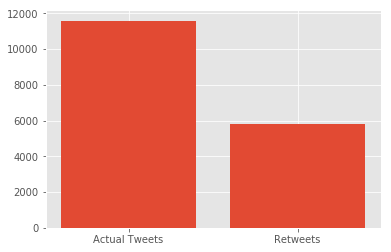

In [3]:
# How many of the tweets are actually re-tweets?
print("Unique tweets: {}".format(len(df['tweets'].unique())))
print("All tweets: {}".format(len(df['tweets'])))

plt.bar([1,2], [len(actual_tweets), len(re_tweets)], align='center')
ax = plt.gca()
ax.set_xticks([1,2])
ax.set_xticklabels(['Actual Tweets', 'Retweets'])
plt.savefig('figures_exam_project/re_tweets.png')

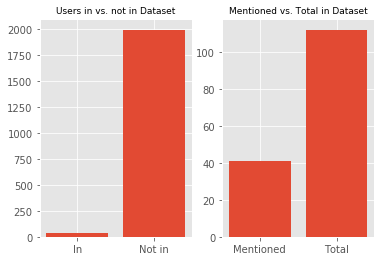

In [4]:
# How many users have been mentioned by other users?
fig, ax = plt.subplots(1,2)

ax[0].bar([1,2], [len(np.unique(in_set[:,1])), len(np.unique(not_in_set[:,1]))], align='center')
ax[0].set_xticks([1,2])
ax[0].set_xticklabels(['In', 'Not in'])
ax[0].set_title('Users in vs. not in Dataset', fontsize=9)

ax[1].bar([1,2], [len(np.unique(in_set[:,1])), len(df['username'].unique())], align='center')
ax[1].set_xticks([1,2])
ax[1].set_xticklabels(['Mentioned', 'Total'])
ax[1].set_title('Mentioned vs. Total in Dataset', fontsize=9)

plt.savefig('figures_exam_project/mentioned_inout.png')
# majority of users mentioned are outside the scope of the dataset.
# ca. 40 out of 110 users are mentioned within the dataset.
# only use mentioned usernames where users are not mentioning themselves.

In [5]:
# Map the most influential/ most mentioned users
sender_count = Counter(in_set[:,0])
receiver_count = Counter(in_set[:,1])
top_5_senders = sender_count.most_common(5)
top_5_receivers = receiver_count.most_common(5)

print(top_5_senders)
print(top_5_receivers)


# And who are these top 5?
for name, _ in top_5_receivers:
    print("Username: {} - {}\n".format(name,
            df[df['username'] == name]['description'].dropna().unique()[0]))
    
    
for name, _ in top_5_senders:
    print("Username: {} - {}\n".format(name,
            df[df['username'] == name]['description'].dropna().unique()))

[('MaghrabiArabi', 49), ('WarReporter1', 30), ('AsimAbuMerjem', 27), ('Uncle_SamCoco', 27), ('moustiklash', 20)]
[('RamiAlLolah', 53), ('Nidalgazaui', 34), ('MilkSheikh2', 26), ('WarReporter1', 15), ('_IshfaqAhmad', 15)]
Username: RamiAlLolah - Real-Time News, Exclusives, Intelligence & Classified Information/Reports from the ME. Forecasted many Israeli strikes in Syria/Lebanon. Graphic content.

Username: Nidalgazaui - 17yr. old Freedom Activist
/Correspondence of NGNA /Terror Expert/Middle East Expert. Daily News about Syria/Iraq/Yemen/Russia/Middle East

Username: MilkSheikh2 - Muslim, Iraqi, Banu Zubid, Qahtani, Chef, Engineer, Remaining until the best of them, fights al-Dajjal, Translate Old stuff mostly

Username: WarReporter1 - Reporting on conflicts in the MENA and Asia regions.

Username: _IshfaqAhmad - Medico at GMC Srinagar • Pro-Khilafah • Anti-Democratic • Anti-Nationalistic • Anti-Rafidah • Innocent Bystander of the Conflict in Middle East • Cricketist •

Username: Maghra

Username: Uncle_SamCoco - ["Here to defend the  American freedom and also the freedom of coconut . Cat Lover or Hater. Kebab Fan . We're all living in America, America ist wunderbar #USA"]

Username: RamiAlLolah - ['Real-Time News, Exclusives, Intelligence & Classified Information/Reports from the ME. Forecasted many Israeli strikes in Syria/Lebanon. Graphic content.']

Username: warrnews - ['we provide fresh news from every battlefield']

Username: WarReporter1 - ['Reporting on conflicts in the MENA and Asia regions.'
 'Reporting on conflicts in the MENA and Asia regions. Not affiliated to any group or movement.']

Username: mobi_ayubi - ['Journalist, specialize in ongoing war against terrorism.\rRetweet is not endorsement.']

Username: _IshfaqAhmad - ['Medico at GMC Srinagar • Pro-Khilafah • Anti-Democratic • Anti-Nationalistic • Anti-Rafidah • Innocent Bystander of the Conflict in Middle East • Cricketist •']

Username: wayf44rerr - ['News of Maghreb and Mashreq' 'justnothing']

Use

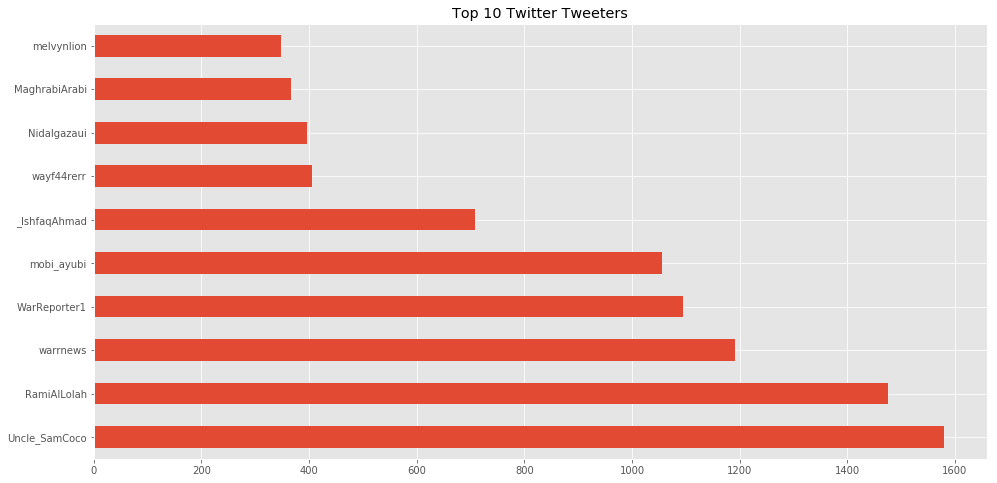

In [7]:
# Most active users
top_active = df.username.value_counts().sort_values(ascending=False)
top_active.head(10).plot.barh(title='Top 10 Twitter Tweeters', figsize=(16,8), color=default_red)
plt.savefig('figures_exam_project/most_active.png')

for name in top_active.index[:10]:
    print("Username: {} - {}\n".format(name,
            df[df['username'] == name]['description'].dropna().unique()))

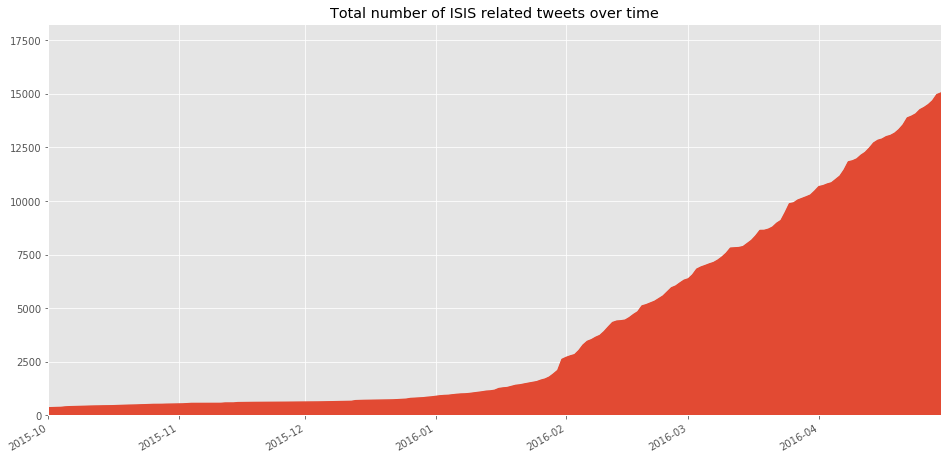

In [8]:
# Tweets over time
df.date.value_counts().plot(title='ISIS related tweets over time',
                              xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                              figsize=(16,8),color=default_red)
plt.savefig('figures_exam_project/overall_timestamp.png')


df.date.value_counts().sort_index().cumsum().plot.area(title='Total number of ISIS related tweets over time',
                                                         xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                                                         figsize=(16,8),color=default_red)
plt.savefig('figures_exam_project/cumulative_timestamp.png')